In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv


In [25]:
import warnings
warnings.filterwarnings("ignore",category= RuntimeWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

In [26]:
import seaborn as sn
import matplotlib.pyplot as plt
from collections import Counter

In [27]:
df = pd.read_csv("/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv",
                encoding = "utf-8",
                encoding_errors = "ignore")

df.shape


(8809, 26)

In [28]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [30]:
df.columns[12:26]

Index(['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [31]:
df = df.drop(df.columns[12:26], axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [33]:
df['date_added'] = pd.to_datetime(df['date_added'],errors="coerce")
df['year_added'] = df['date_added'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8809 non-null   object        
 1   type          8809 non-null   object        
 2   title         8809 non-null   object        
 3   director      6175 non-null   object        
 4   cast          7984 non-null   object        
 5   country       7978 non-null   object        
 6   date_added    8711 non-null   datetime64[ns]
 7   release_year  8809 non-null   int64         
 8   rating        8805 non-null   object        
 9   duration      8806 non-null   object        
 10  listed_in     8809 non-null   object        
 11  description   8809 non-null   object        
 12  year_added    8711 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.8+ KB


In [34]:
df['duration']

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8804       88 min
8805       88 min
8806      111 min
8807     1 Season
8808      110 min
Name: duration, Length: 8809, dtype: object

In [35]:
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract("(min|Season)")

df['duration_type']

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_55/699087848.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


0          min
1       Season
2       Season
3       Season
4       Season
         ...  
8804       min
8805       min
8806       min
8807    Season
8808       min
Name: duration_type, Length: 8809, dtype: object

In [36]:
df['genere'] = df["listed_in"].str.split(', ')
df['genere'].head()

0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: genere, dtype: object

In [37]:
df['countries'] = df['country'].str.split(', ')
df['countries']

0       [United States]
1        [South Africa]
2                   NaN
3                   NaN
4               [India]
             ...       
8804    [United States]
8805    [United States]
8806            [India]
8807      [South Korea]
8808    [United States]
Name: countries, Length: 8809, dtype: object

In [38]:
df['rating'] = df['rating'].fillna('Unknown')
df['rating']

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8804        R
8805       PG
8806    TV-14
8807    TV-MA
8808        A
Name: rating, Length: 8809, dtype: object

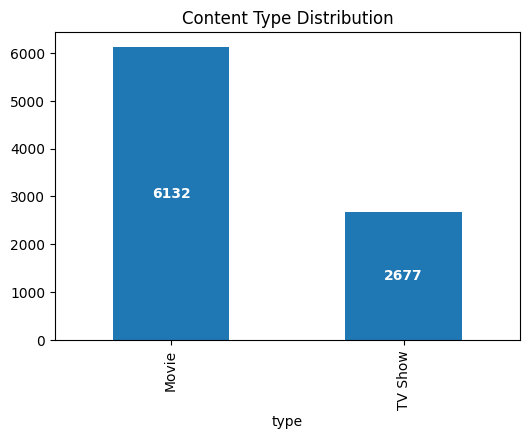

In [39]:
pic = df['type'].value_counts().plot(

    kind = 'bar',
    title = 'Content Type Distribution',
    figsize = (6,4)
)

for p in pic.patches:
    pic.annotate(
        str(int(p.get_height())),
        (p.get_x()+p.get_width()/2 , p.get_height()/2),
        ha = 'center',
        va = 'center',
        color = 'white',
        fontweight = 'bold'
    )

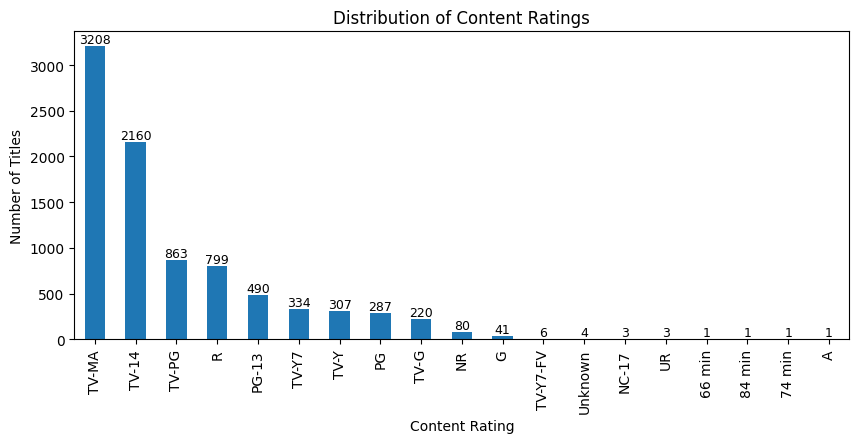

In [40]:
graph  = df['rating'].value_counts().plot(
    kind = 'bar',
    title = 'Distribution of Content Ratings',
    figsize = (10,4)
)

graph.set_xlabel('Content Rating')
graph.set_ylabel('Number of Titles')

# Add value labels on top of bars
for p in graph.patches:
    graph.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=9
    )
    


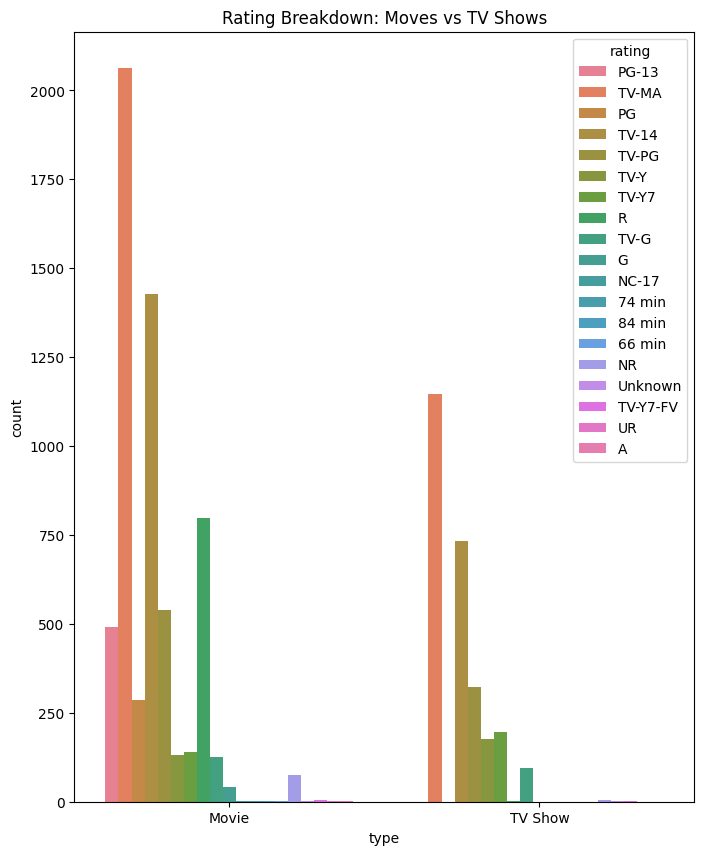

In [41]:
plt.figure(figsize=(8,10))
sn.countplot(data=df,x = "type", hue='rating')
plt.title('Rating Breakdown: Moves vs TV Shows')
plt.show()

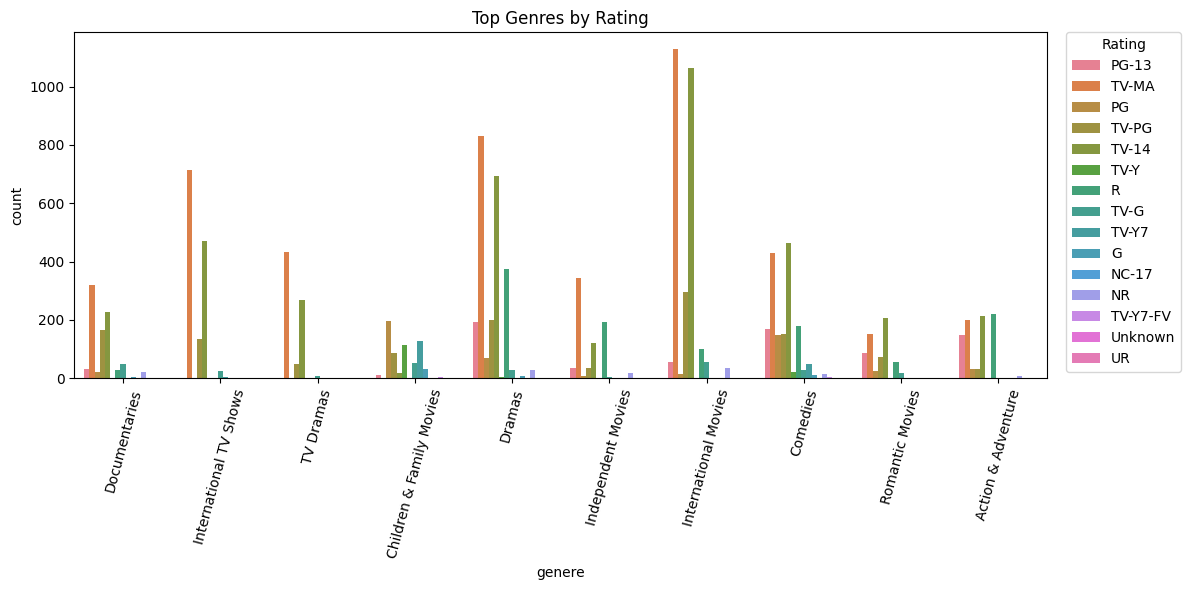

In [42]:
genre_rating = []

for _,row in df.dropna(subset=['genere']).iterrows():
    for g in row['genere']:
        genre_rating.append((g,row['rating']))

gr_df = pd.DataFrame(genre_rating, columns = ['genere','rating'])

top_genres = gr_df['genere'].value_counts().head(10).index
gr_df = gr_df[gr_df['genere'].isin(top_genres)]


plt.figure(figsize=(12,6))
graph = sn.countplot(data = gr_df, x = 'genere', hue ='rating')
plt.xticks(rotation = 75)
plt.title("Top Genres by Rating")

graph.legend(
    title = "Rating",
    bbox_to_anchor = (1.02,1),
    loc = "upper left",
    borderaxespad = 0
    
)
plt .tight_layout()
plt.show()

In [43]:

df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [44]:
df_clean = df.dropna(subset=['year_added'])

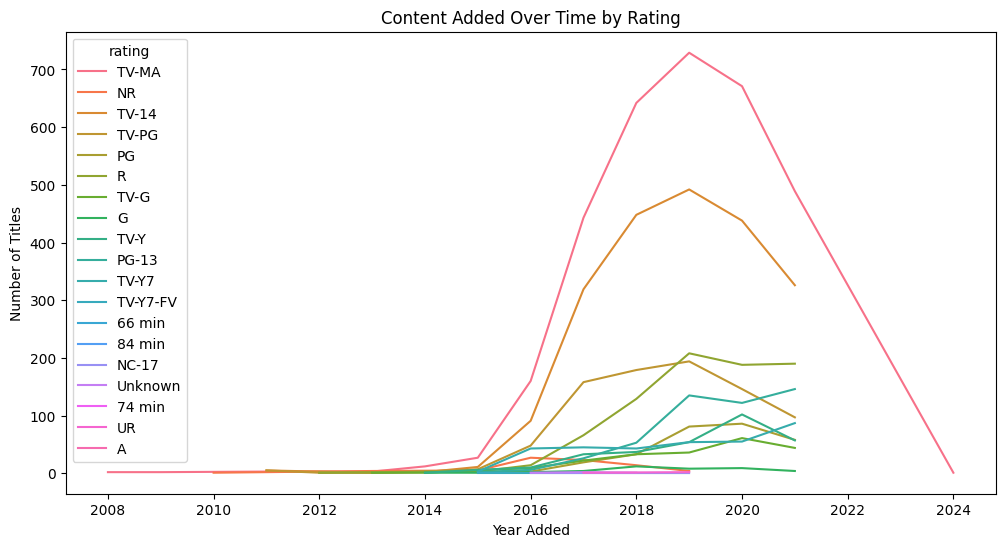

In [45]:
year_rating = df_clean.groupby(['year_added','rating']).size().reset_index(name='count')
plt.figure(figsize=(12,6))
sn.lineplot(data=year_rating, x='year_added', y='count', hue='rating')
plt.title("Content Added Over Time by Rating")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()

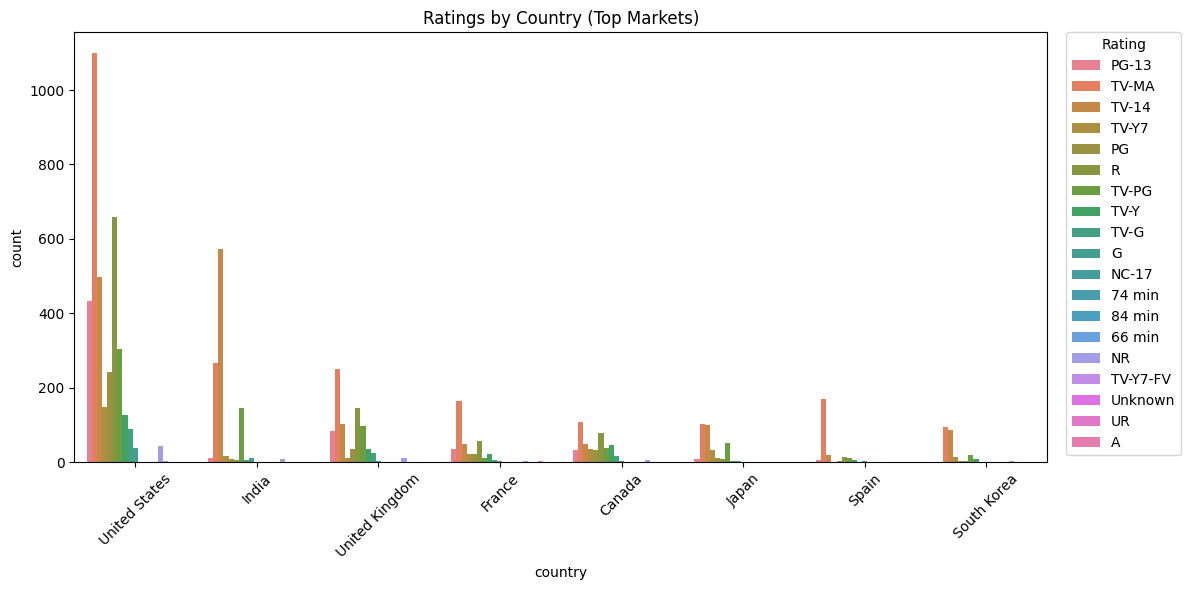

In [46]:
country_rating = []

for _, row in df.dropna(subset=['countries']).iterrows():
    for c in row['countries']:
        country_rating.append((c, row['rating']))

cr_df = pd.DataFrame(country_rating, columns=['country', 'rating'])
top_countries = cr_df['country'].value_counts().head(8).index
cr_df = cr_df[cr_df['country'].isin(top_countries)]

plt.figure(figsize=(12,6))
graph = sn.countplot(data=cr_df, x='country', hue='rating')
plt.xticks(rotation=45)
plt.title("Ratings by Country (Top Markets)")

graph.legend(
    title = "Rating",
    bbox_to_anchor = (1.02,1),
    loc = "upper left",
    borderaxespad = 0
    
)
plt .tight_layout()
plt.show()
